# Nettoyage des données

## Imports

In [36]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

## Analyse exploratoire des données

In [37]:
data_path='./data/data.csv'
df = pd.read_csv(data_path)

df.head()

,nom,prenom,age,taille,poids,sexe,sport_licence,niveau_etude,region,smoker,nationalité_francaise,revenu_estime_mois,situation_familiale,historique_credits,risque_personnel,date_creation_compte,score_credit,loyer_mensuel,montant_pret
0,Ramirez,Casey,73,161.1,67.3,H,non,master,Occitanie,non,oui,857,célibataire,NaN,0.11,2024-09-28,615.0,1377.97,13157.101646
1,Hill,Phillip,44,168.2,74.9,H,non,bac,Île-de-France,non,oui,5245,célibataire,2.0,0.79,2023-06-26,NaN,10000.00,32408.309272
2,Hernandez,Martin,71,160.3,45.5,H,non,doctorat,Auvergne-Rhône-Alpes,oui,oui,3792,célibataire,0.0,0.13,2023-06-13,NaN,5000.00,17975.461375
3,Miller,Michael,62,161.9,87.7,F,oui,bac,Auvergne-Rhône-Alpes,oui,oui,3291,divorcé,NaN,0.32,2024-01-12,NaN,10000.00,16004.737731
4,Walker,Matthew,18,178.0,77.6,F,oui,bac,Corse,non,oui,3893,célibataire,NaN,0.66,2023-02-16,NaN,NaN,10437.682760


In [38]:
df.describe()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.000000,10000.000000,10000.000000,4707.000000,10000.000000,4694.000000,7094.00000,10000.000000
mean,46.516500,170.003760,70.064080,2520.996200,2.543446,0.499094,573.495952,5175.89104,9149.762575
std,16.832845,10.006542,15.014911,1157.532502,1.691198,0.290107,159.140639,3750.61004,10785.937404
min,18.000000,119.200000,10.500000,500.000000,0.000000,0.000000,300.000000,-395.25000,500.000000
25%,32.000000,163.200000,59.800000,1683.000000,1.000000,0.240000,437.000000,985.76750,500.000000
50%,46.000000,170.100000,70.200000,2480.000000,3.000000,0.500000,574.000000,5000.00000,3600.605667
75%,61.000000,176.800000,80.300000,3304.000000,4.000000,0.750000,712.000000,10000.00000,16245.534725
max,75.000000,209.800000,145.200000,6826.000000,5.000000,1.000000,849.000000,10000.00000,53192.053509


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nom                    10000 non-null  object 
 1   prenom                 10000 non-null  object 
 2   age                    10000 non-null  int64  
 3   taille                 10000 non-null  float64
 4   poids                  10000 non-null  float64
 5   sexe                   10000 non-null  object 
 6   sport_licence          10000 non-null  object 
 7   niveau_etude           10000 non-null  object 
 8   region                 10000 non-null  object 
 9   smoker                 10000 non-null  object 
 10  nationalité_francaise  10000 non-null  object 
 11  revenu_estime_mois     10000 non-null  int64  
 12  situation_familiale    7648 non-null   object 
 13  historique_credits     4707 non-null   float64
 14  risque_personnel       10000 non-null  float64
 15  dat

## Suppression des colonnes problématiques

#### Données à caractère personnel
Les colonnes `nom` et `prenom` représentent des données personnelles directes, elles sont inutiles à la prédiction et posent question vis-à-vis de la RGPD.
La colonne `date_creation_compte` n'a pas d'utilité métier et pourrait permettre une ré-identification.

#### Données à caractère discriminatoire
| La loi sur l’égalité des chances économiques, qui vise à interdire toute discrimination dans l’accès à un crédit sur la base du sexe, de l’âge ou du lieu de résidence.  
[source](https://www.avocatfrance.fr/les-reglementations-relatives-aux-pratiques-de-credit-equitables/)  

La colonne `sexe` est donc à supprimer, tout comme la colonne `nationalité_francaise`.  
Les colonnes `region` et `age` faisant respectivement référence aux notions de discrimination sur le lieu de résidence et l'âge, seront traîtées séparément pour tenter de limiter ces biais discriminatoire.  

La taille et le poids ne représente aucune plusvalue métier et représentent un risque de discrimination physique.

In [40]:
personal_data_cols = ['nom', 'prenom', 'date_creation_compte']
discriminatory_data = ['sexe', 'nationalité_francaise', 'taille', 'poids']

cols_to_drop = personal_data_cols + discriminatory_data

df = df.drop(columns=cols_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  int64  
 1   sport_licence        10000 non-null  object 
 2   niveau_etude         10000 non-null  object 
 3   region               10000 non-null  object 
 4   smoker               10000 non-null  object 
 5   revenu_estime_mois   10000 non-null  int64  
 6   situation_familiale  7648 non-null   object 
 7   historique_credits   4707 non-null   float64
 8   risque_personnel     10000 non-null  float64
 9   score_credit         4694 non-null   float64
 10  loyer_mensuel        7094 non-null   float64
 11  montant_pret         10000 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 937.6+ KB


## Encodage des données

### Transformation de l'âge en catégories

Utilisation de tranches d'âge large pour minimiser le risque discriminatoire lié à l'âge.

In [41]:
bins = [17, 30, 45, 60, 100]
labels = ['18-29', '30-44', '45-59', '60+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [42]:
df = df.drop(columns=['age'])
df.head()

,sport_licence,niveau_etude,region,smoker,revenu_estime_mois,situation_familiale,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret,age_group
0,non,master,Occitanie,non,857,célibataire,NaN,0.11,615.0,1377.97,13157.101646,60+
1,non,bac,Île-de-France,non,5245,célibataire,2.0,0.79,NaN,10000.00,32408.309272,30-44
2,non,doctorat,Auvergne-Rhône-Alpes,oui,3792,célibataire,0.0,0.13,NaN,5000.00,17975.461375,60+
3,oui,bac,Auvergne-Rhône-Alpes,oui,3291,divorcé,NaN,0.32,NaN,10000.00,16004.737731,60+
4,oui,bac,Corse,non,3893,célibataire,NaN,0.66,NaN,NaN,10437.682760,18-29


<Axes: xlabel='age_group', ylabel='count'>

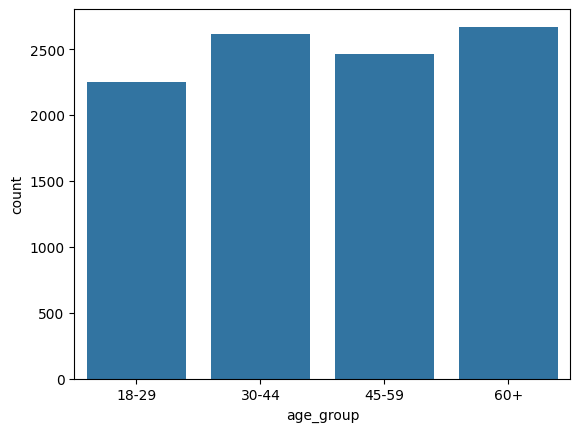

In [43]:
sns.countplot(x=df['age_group'])

### Regroupement des régions

Regroupement des régions pour tenter d'amoindrir le biais géographique direct.

In [44]:
df['region'].value_counts()

region
Provence-Alpes-Côte d’Azur    1286
Île-de-France                 1269
Normandie                     1258
Hauts-de-France               1254
Auvergne-Rhône-Alpes          1253
Occitanie                     1250
Bretagne                      1216
Corse                         1214
Name: count, dtype: int64

In [45]:

economic_based_regions = {
    'region_parisienne' : ['Île-de-France'],
    'regions_industrielles': ['Hauts-de-France', 'Grand-Est', 'Bourgogne-Franche-Comté'],
    'regions_tertiaires': ['Bretagne', 'Pays-de-la-Loire', 'Centre-Val-de-Loire', 'Normandie'],
    'regions_touristiques_services': ['Nouvelle-Aquitaine', 'Occitanie', 'Auvergne-Rhône-Alpes', 'PACA', 'Corse'],
}

def replace_by_dict(old_value, matching_values):
    for matching_value, values in matching_values.items():
        if old_value in values:
            return matching_value
    return old_value

df['region'] = df['region'].apply(lambda x: replace_by_dict(x, economic_based_regions))

df['region'].value_counts()

region
regions_touristiques_services    3717
regions_tertiaires               2474
Provence-Alpes-Côte d’Azur       1286
region_parisienne                1269
regions_industrielles            1254
Name: count, dtype: int64

## Export du CSV suivant des règles éthiques

In [49]:
df.to_csv('./data/ethical_data.csv', index=False)